In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
#importing the necessary libraries

In [3]:
df = pd.read_csv('Clothes.csv') #reading the csv file

In [4]:
df.head() #display the first rows to give a snippet of the data set

,S.no,ASIN,Rating,Review Title,Review,Product Name,Brand,Unnamed: 7,Unnamed: 8,Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,B08THVX64T,5.0,Really nice material and good fit,Product is true to fit and as it showed in the...,VERO MODA Women's Vmava Plain SS Top Ga Noos T...,VERO MODA,NaN,NaN,Tshirt
2,3.0,B07V35NX7T,5.0,Good quality,Good quality and comfortable,Mariposa Women's Long Sleeve T-Shirt,Mariposa Women's,NaN,NaN,Tshirt
3,4.0,‎ B095YQTFS9,5.0,Really cute summer top,Really like the color ( hot pink) oversized bu...,MIRACMODA Women Open Back Athlete Loose Fittin...,MIRACMODA Women,NaN,NaN,Tshirt
4,5.0,B07MDCQR68,4.0,size is a bit smaller,size is a bit smaller,Levi's Womens Crewneck Classic Batwing Logo T ...,Levi's Womens,NaN,NaN,Tshirt


In [5]:
print(df.shape) #collected 200 samples and removed the ones without proper data

(172, 10)


In [7]:
df['Rating'].value_counts()#Shows the count of each star

5.0    104
4.0     20
3.0     20
2.0     12
1.0     12
Name: Rating, dtype: int64

In [10]:
example = df['Review Title'][50]
print(example)
#to show the 50th entry in reviews

 Perfect fitting


In [12]:
nltk.word_tokenize(example)#splitting the sentence into words with the help of nltk(natural language processing toolkit)

['Perfect', 'fitting']

In [18]:
#Vader analysis -> stop words are removed -> each word is scored and combined to a total score

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
sia.polarity_scores('I am so happy') #It will give a score for the sentence using sentiment analysis in polarity range meaning Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [23]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [37]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['Review Title'])
    myid = row['S.no']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/172 [00:00<?, ?it/s]

In [38]:
res

{nan: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2.0: {'neg': 0.0, 'neu': 0.261, 'pos': 0.739, 'compound': 0.8173},
 3.0: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404},
 4.0: {'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.6549},
 5.0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6.0: {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 7.0: {'neg': 0.0, 'neu': 0.268, 'pos': 0.732, 'compound': 0.8481},
 8.0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9.0: {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.7351},
 10.0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11.0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12.0: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 13.0: {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719},
 14.0: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023},
 15.0: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994},
 16.0: {'neg': 0.0, '

In [40]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'S.no'})
vaders = vaders.merge(df, how='left')


In [41]:
vaders.head()

,S.no,neg,neu,pos,compound,ASIN,Rating,Review Title,Review,Product Name,Brand,Unnamed: 7,Unnamed: 8,Category
0,NaN,0.0,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,2.0,0.0,0.261,0.739,0.8173,B08THVX64T,5.0,Really nice material and good fit,Product is true to fit and as it showed in the...,VERO MODA Women's Vmava Plain SS Top Ga Noos T...,VERO MODA,NaN,NaN,Tshirt
3,3.0,0.0,0.256,0.744,0.4404,B07V35NX7T,5.0,Good quality,Good quality and comfortable,Mariposa Women's Long Sleeve T-Shirt,Mariposa Women's,NaN,NaN,Tshirt
4,4.0,0.0,0.272,0.728,0.6549,‎ B095YQTFS9,5.0,Really cute summer top,Really like the color ( hot pink) oversized bu...,MIRACMODA Women Open Back Athlete Loose Fittin...,MIRACMODA Women,NaN,NaN,Tshirt


AttributeError: Rectangle.set() got an unexpected keyword argument 'score'

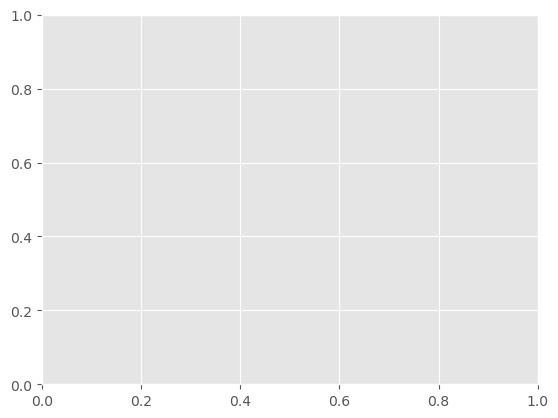

In [43]:
sns.barplot(data=vaders, score='Rating', y='compound')
plt.show()

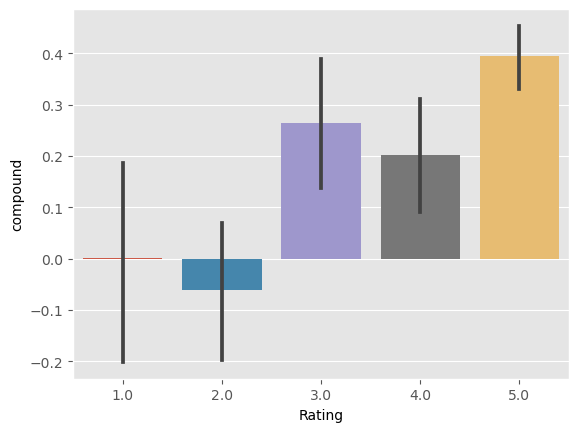

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=vaders, x='Rating', y='compound')
plt.show()



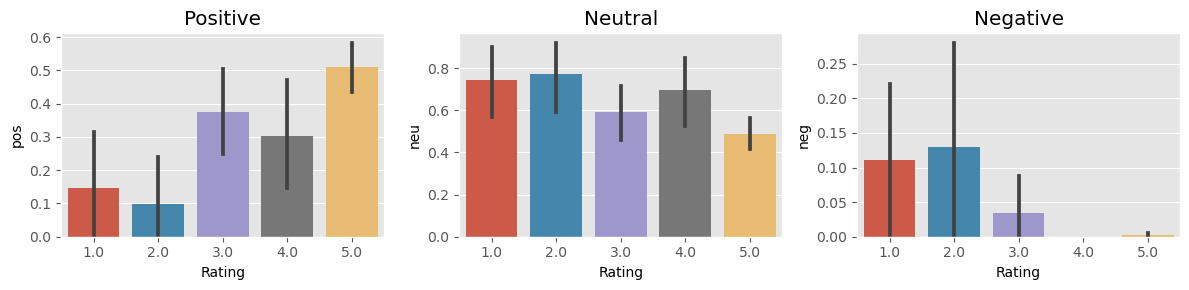

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [46]:
#The plt.tight_layout() function is used to automatically adjust the spacing between subplots to avoid overlapping elements. It ensures that all subplots are clearly visible within the figure.

In [48]:
#By specifying the figsize as (12, 3), you are creating a relatively wide and short figure. This aspect ratio can be suitable for displaying multiple subplots side by side, such as in your case where you have three subplots arranged horizontally.